In [10]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import numpy as np
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_dataset = train_datagen.flow_from_directory('../datas/train', 
                                          target_size=(60,60),
                                          batch_size=32,
                                          class_mode="categorical")
test_dataset = test_datagen.flow_from_directory('../datas/test', 
                                          target_size=(60,60),
                                          batch_size=32,
                                          class_mode="categorical")                                   

Found 9271 images belonging to 16 classes.
Found 3983 images belonging to 16 classes.


In [13]:
train_dataset.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'ba': 10,
 'gha': 11,
 'kha': 12,
 'lu': 13,
 'na': 14,
 'pa': 15}

In [14]:
def dataset_to_numpy_array(generator):
    data = []
    labels = []
    for i in range(len(generator)):
        batch_data, batch_labels = generator[i]
        data.append(batch_data)
        labels.append(batch_labels)
    
    data = np.concatenate(data, axis=0)
    labels = np.concatenate(labels, axis=0)
    
    return data, labels

# Convert datasets to NumPy arrays
x_train_r, y_train_r = dataset_to_numpy_array(train_dataset)
x_test_r, y_test_r = dataset_to_numpy_array(test_dataset)

print(x_train_r.shape, y_train_r.shape)
print(x_test_r.shape, y_test_r.shape)

(9271, 60, 60, 3) (9271, 16)
(3983, 60, 60, 3) (3983, 16)


In [20]:
# # Define the CNN model
from tensorflow.keras.layers import Dropout, MaxPool2D


# model = Sequential()

# model.add(Conv2D(64, (3,3), input_shape=x_train_r.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3))) 
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# # model.add(Conv2D(64, (3,3)))
# # model.add(Activation("relu"))
# # model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))
# model.add(Dropout(0.4))  # Adding dropout with rate 0.4

# model.add(Dense(16))  # Assuming there are 13 classes
# model.add(Activation("softmax"))

model=Sequential([
    
    Conv2D(64,(3,3),input_shape=(x_train_r.shape[1:]),activation='relu'),
    MaxPool2D(),
    
    Conv2D(32,(2,2),activation='relu'),
    MaxPool2D(),
    
    Flatten(),
    
    Dense(50,activation='relu'),
    Dropout(.12),
    Dense(44,activation='relu'),
    Dense(16,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/home/zephyr/Desktop/.code/college/alnpr/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 58, 58, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │       313,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 44)             │         2,244 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 326,630 (1.25 MB)

 Trainable params: 326,630 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(x_train_r, y_train_r, epochs=20, batch_size=128, 
                    validation_data=(x_test_r, y_test_r),
                    callbacks=[early_stopping])



Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 31s 411ms/step - accuracy: 0.9276 - loss: 0.2454 - val_accuracy: 0.9505 - val_loss: 0.2069
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 38s 524ms/step - accuracy: 0.9408 - loss: 0.1941 - val_accuracy: 0.9546 - val_loss: 0.1823
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 529ms/step - accuracy: 0.9430 - loss: 0.1876 - val_accuracy: 0.9531 - val_loss: 0.1911
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 534ms/step - accuracy: 0.9481 - loss: 0.1713 - val_accuracy: 0.9576 - val_loss: 0.1757
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 531ms/step - accuracy: 0.9534 - loss: 0.1511 - val_accuracy: 0.9531 - val_loss: 0.1892
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 538ms/step - accuracy: 0.9527 - loss: 0.1617 - val_accuracy: 0.9596 - val_loss: 0.1762
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 536ms/step - accuracy: 0.9545 - loss: 0.1398 - val_accuracy: 0.9566 - val_loss: 0.1859
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 538ms/step - accuracy: 0.9611 - loss: 0.1252 - val_accu

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9573 - loss: 0.1724
Test Loss: 0.17093828320503235
Test Accuracy: 0.9610846042633057


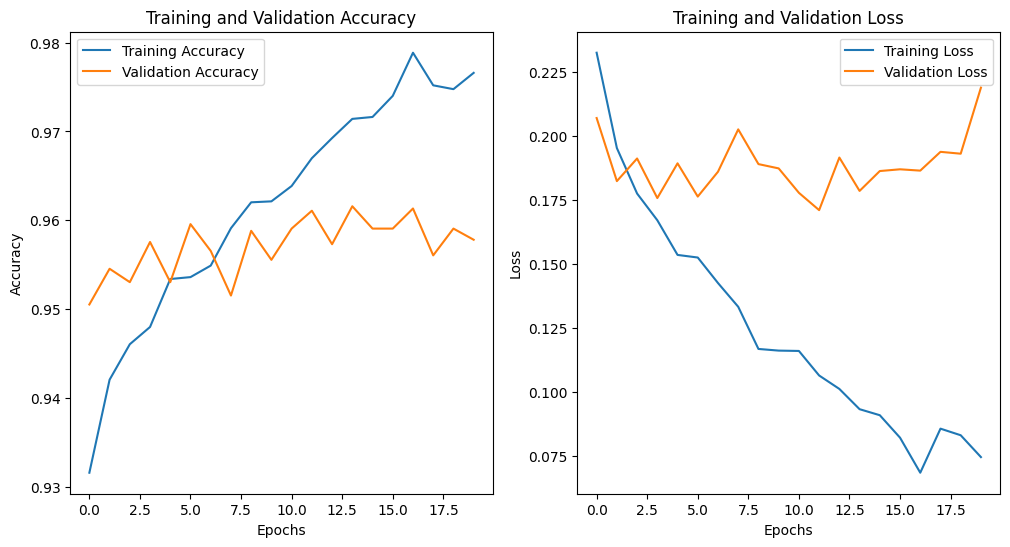

In [28]:
loss, accuracy = model.evaluate(x_test_r, y_test_r)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plotting the training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('train_test_validation.png')
plt.legend()

plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


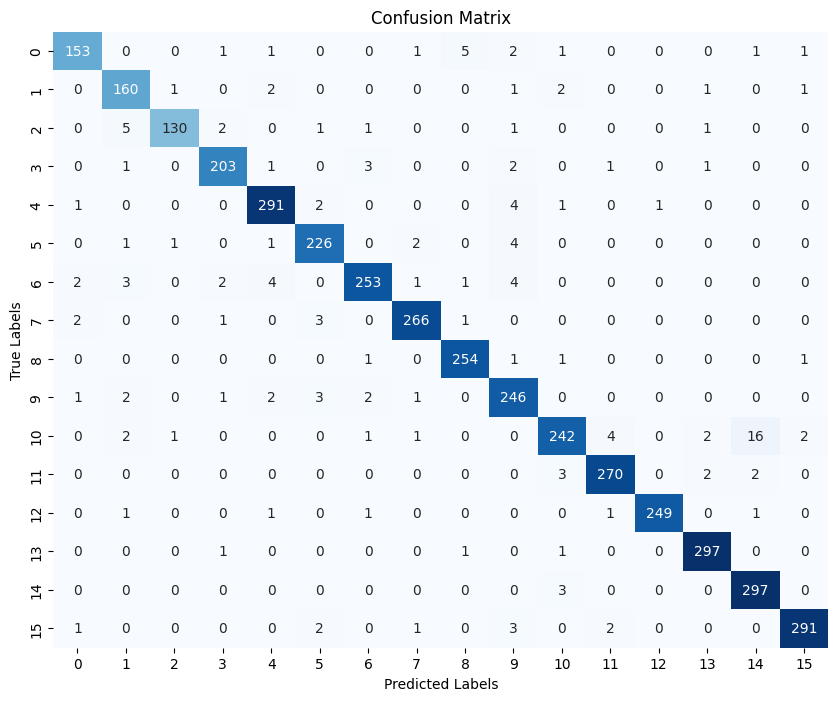

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the classes for the test data
y_pred = model.predict(x_test_r)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded test labels back to their original form
y_true = np.argmax(y_test_r, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save as PNG
plt.show()


In [26]:
model.save('done_1.keras')

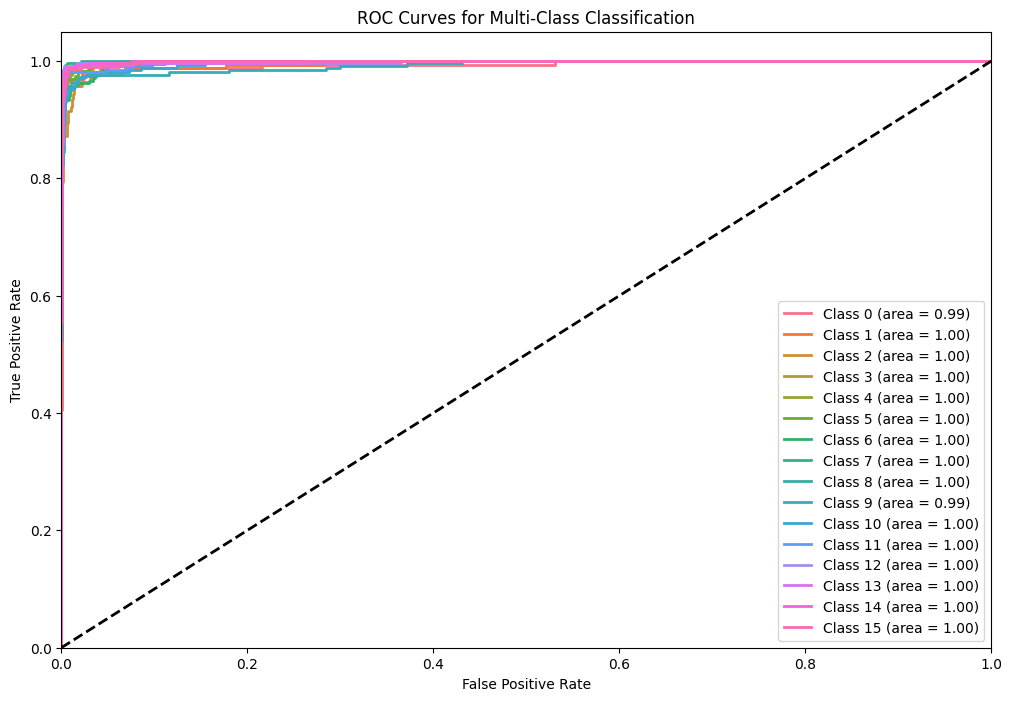

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the true labels
y_test_binarized = label_binarize(y_true, classes=np.arange(len(np.unique(y_true))))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = sns.color_palette("husl", n_classes)

for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.show()
